<a href="https://colab.research.google.com/github/jettooss/bank/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22segmentation%20%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.10.0
!pip install Keras-Applications=== 1.0.7
!pip install image-classifiers == 1.0
!pip install efficientnet == 1.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement Keras-Applications=== (from versions: 1.0.0, 1.0.1, 1.0.2, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8)
ERROR: No matching distribution found for Keras-Applications===
ERROR: Invalid requirement: '=='
ERROR: Invalid requirement: '=='


In [2]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 7.6 MB/s eta 0:00:00


In [3]:
import segmentation_models as sm
import tensorflow as tf
from tensorflow import keras 

Segmentation Models: using `keras` framework.


In [4]:
import os
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [5]:

from google.colab import drive
!gdown "https://drive.google.com/u/0/uc?id=1UujK-kXOhCcjMt0S5OJIcu7SNWyGFEsy&export=download" 
!unzip "archive (1).zip"


Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: data/data_for_keras_aug/val_masks/val/GF2_PMS1__L1A0001395956-MSS1_15label_42.tif  
  inflating: data/data_for_keras_aug/val_masks/val/GF2_PMS1__L1A0001395956-MSS1_15label_420.tif  
  inflating: data/data_for_keras_aug/val_masks/val/GF2_PMS1__L1A0001395956-MSS1_15label_421.tif  
  inflating: data/data_for_keras_aug/val_masks/val/GF2_PMS1__L1A0001395956-MSS1_15label_422.tif  
  inflating: data/data_for_keras_aug/val_masks/val/GF2_PMS1__L1A0001395956-MSS1_15label_423.tif  
  inflating: data/data_for_keras_aug/val_masks/val/GF2_PMS1__L1A0001395956-MSS1_15label_424.tif  
  inflating: data/data_for_keras_aug/val_masks/val/GF2_PMS1__L1A0001395956-MSS1_15label_425.tif  
  inflating: data/data_for_keras_aug/val_masks/val/GF2_PMS1__L1A0001395956-MSS1_15label_426.tif  
  inflating: data/data_for_keras_aug/val_masks/val/GF2_PMS1__L1A0001395956-MSS1_15label_427.tif  
  inflating: data/data_for_keras_aug/val_masks/val/

In [6]:
import cv2
import matplotlib.patches as mpatches
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import segmentation_models as sm
import tqdm

In [7]:

from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from tensorflow.keras.metrics import MeanIoU, IoU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.experimental.numpy import ravel
from tensorflow import stack, cast, int32, make_ndarray

In [8]:
!gdown https://drive.google.com/drive/u/1/my-drive
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

/usr/local/lib/python3.9/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/u/1/my-drive
To: /content/my-drive
156kB [00:00, 5.15MB/s]


In [9]:
BACKBONE = 'mobilenet'

preprocess_input = sm.get_preprocessing(BACKBONE)
BATCH_SIZE = 64
SEED = 42
RAW_N_CLASSES = 16
N_CLASSES = 14

In [10]:
import tensorflow  as tf

In [54]:
def merge_classes(mask, cls1, cls2, raw_num_classes=RAW_N_CLASSES):
    mask[mask == cls1] = cls2
    for i in range(cls1 + 1, raw_num_classes):
        mask[mask==i] = i - 1
    return mask

def preprocess_data(img, mask, num_class):
    img = preprocess_input(img)
    
    # merge some classes
    mask = merge_classes(mask, 7, 6)
    mask = merge_classes(mask, 13, 12)
    mask = to_categorical(mask, num_class)
    return (img, mask)

def trainGenerator(train_img_path, train_mask_path, num_class, aug=True, show_raw=False):
    s=0
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')
    if aug:
        image_datagen = ImageDataGenerator(**img_data_gen_args)
        mask_datagen = ImageDataGenerator(**img_data_gen_args)
    else:
        image_datagen = ImageDataGenerator()
        mask_datagen = ImageDataGenerator()
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = BATCH_SIZE,
        seed = SEED)
    print(image_generator)
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        batch_size = BATCH_SIZE,
        seed = SEED)
    print(mask_generator)
    train_generator = zip(image_generator, mask_generator)
    s=0
    for (img, mask) in train_generator:
        if show_raw:
            raw_img = np.copy(img)
            img, mask = preprocess_data(img, mask, num_class)
            img = np.stack((img, raw_img), axis=-1)
            if s<=5000:
             yield (img, mask)
             s+=1
            else:
              break
            
        else:
            img, mask = preprocess_data(img, mask, num_class)
            yield (img, mask)


def show_mask_with_label(batch, labels, _min, _max, alpha=1):
    values, counts = np.unique(batch, return_counts=True)
    counts = counts / (256*256)
    im = plt.imshow(batch, cmap='viridis', vmin = _min, vmax = _max, alpha=alpha)
    colors = [im.cmap(im.norm(value)) for value in values]
    
    patches = [mpatches.Patch(color=colors[i], label=labels[values[i]]) \
               for i in range(len(values)) if counts[i] > 0.005]
    plt.legend(handles=patches)

In [122]:
def trainGenerator1(train_img_path,train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = BATCH_SIZE,
        seed = SEED)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        batch_size = BATCH_SIZE,
        seed = SEED)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)


In [13]:
kaggle_path = 'data/'
labels = ['background','industrial land',
          'urban residential','rural residential',
          'traffic land','paddy field','irrigated land', 'dry cropland',
          'garden plot','arbor woodland',
          'shrub land','natural grassland',
          'artificial grassland','river', 'lake','pond']

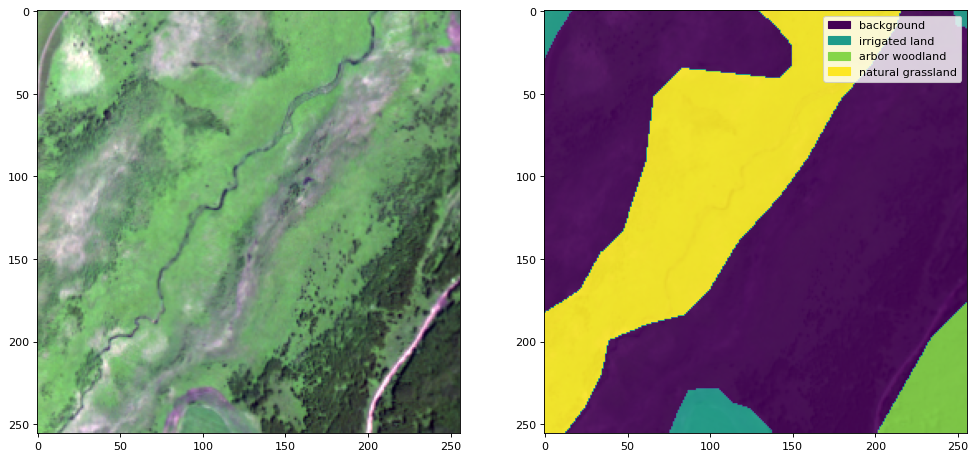

In [14]:
train_img_dir = kaggle_path + "data_for_keras_aug/train_images/train/"
train_mask_dir = kaggle_path + "data_for_keras_aug/train_masks/train/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

img_list.sort()
msk_list.sort()

num_images = len(os.listdir(train_img_dir))
img_num = random.randint(0, num_images - 1)

img_for_plot = cv2.imread(train_img_dir+img_list[img_num], 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot = cv2.imread(train_mask_dir+msk_list[img_num], 0)

_min, _max = np.amin(mask_for_plot), np.amax(mask_for_plot)

plt.figure(figsize=(15, 15), dpi=80)

plt.subplot(1,2,1)
plt.imshow(img_for_plot.astype('uint8'))

plt.subplot(1,2,2)
plt.imshow(img_for_plot.astype('uint8'))

plt.subplot(1,2,2)
show_mask_with_label(mask_for_plot, labels, _min, _max, alpha=0.9) # add some opacity  

plt.show()

In [15]:
train_img_path = kaggle_path + "data_for_keras_aug/train_images/"
train_mask_path = kaggle_path + "data_for_keras_aug/train_masks/"
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=N_CLASSES)

val_img_path = kaggle_path + "data_for_keras_aug/val_images/"
val_mask_path = kaggle_path + "data_for_keras_aug/val_masks/"
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=N_CLASSES)

Found 35292 images belonging to 1 classes.
Found 35292 images belonging to 1 classes.


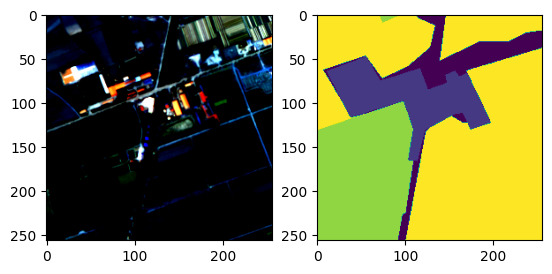

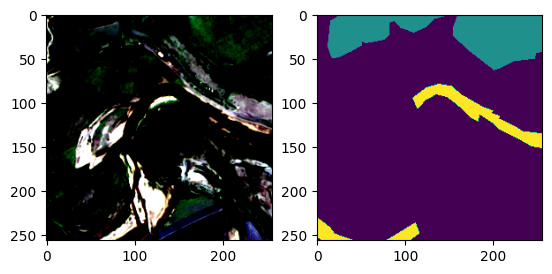

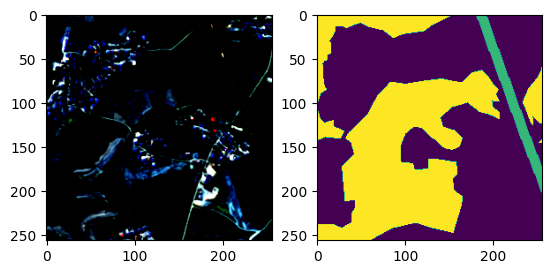

In [16]:
def show_examples(generator):
    x, y = generator.__next__()
    for i in range(0,2):
        image = x[i]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = np.argmax(y[i], axis=2)
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.subplot(1,2,2)
        plt.imshow(mask, cmap='viridis')
        plt.show()
    return x, y

x, y = show_examples(train_img_gen)

In [17]:
num_train_imgs = len(os.listdir(train_img_path + "/train"))
num_val_images = len(os.listdir(val_img_path + "/val"))

steps_per_epoch = num_train_imgs // BATCH_SIZE
val_steps_per_epoch = num_val_images // BATCH_SIZE

IMG_HEIGHT = x.shape[1]
IMG_WIDTH  = x.shape[2]
IMG_CHANNELS = x.shape[3]

In [18]:
model1 = sm.Unet(BACKBONE, encoder_weights='imagenet',
  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
  classes=N_CLASSES, activation='softmax')
model1.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=[sm.metrics.iou_score])

/usr/local/lib/python3.9/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17225924/17225924 [==============================] - 0s 0us/step


In [ ]:


#Other losses to try: categorical_focal_dice_loss, cce_jaccard_loss, cce_dice_loss, categorical_focal_loss

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
# print(model.summary())
# print(model.input_shape)
#Fit the model
#history = model.fit(my_generator, validation_data=validation_datagen, steps_per_epoch=len(X_train) // 16, validation_steps=len(X_train) // 16, epochs=100)
#Train the model.
history=model1.fit(train_img_gen,
  steps_per_epoch=steps_per_epoch,
  epochs=30,
  verbose=1,
  validation_data=val_img_gen,
 validation_steps=val_steps_per_epoch)

model1.save('_30_epochs_.hdf5')

Epoch 1/30


In [20]:
from keras.models import load_model 


In [25]:
s='/content/drive/MyDrive/Colab Notebooks/_15_epochs_ (1).hdf5'

# satellite_model = load_model(s)
model = load_model(s, compile=False)


Found 6920 images belonging to 1 classes.
Found 6920 images belonging to 1 classes.
2/2 [==============================] - 28s 11s/step
Mean IoU = 0.43070528


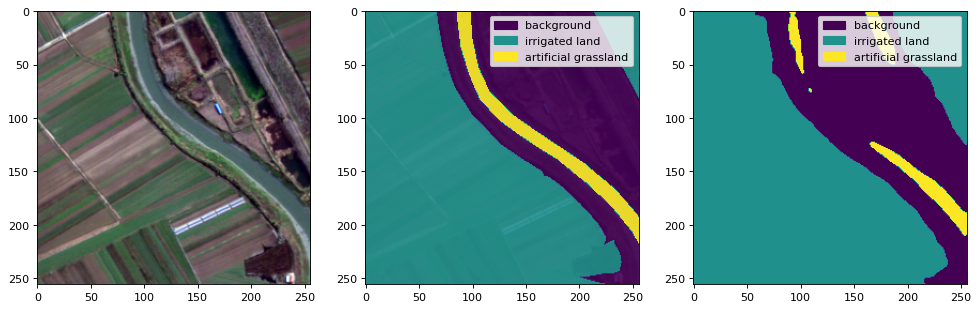

2/2 [==============================] - 22s 15s/step
Mean IoU = 0.4824932


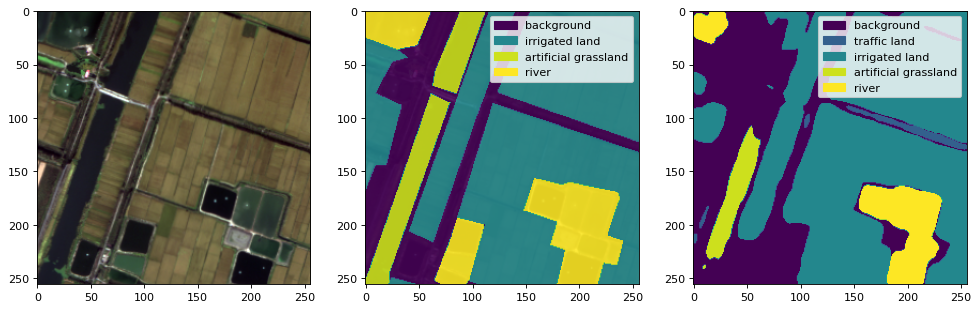

2/2 [==============================] - 31s 13s/step
Mean IoU = 0.4424324


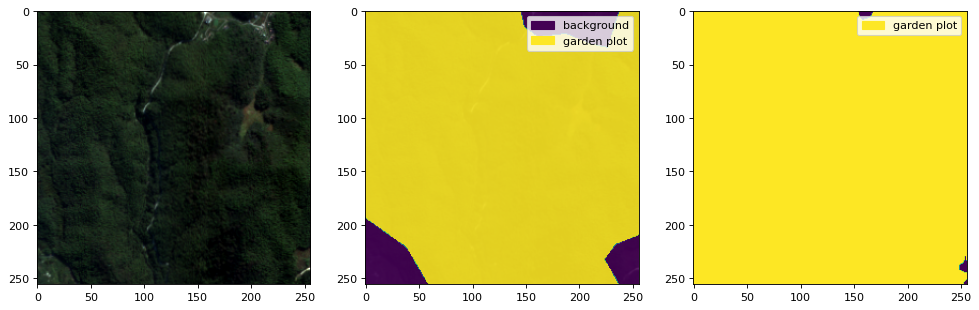

2/2 [==============================] - 17s 8s/step
Mean IoU = 0.4445814


In [89]:
eval_preds_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=N_CLASSES, show_raw=True)
test_image_batch, test_mask_batch = eval_preds_img_gen.__next__()
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3)

test_pred_batch = model.predict(test_image_batch[:, :, :, :, 0])
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=3)


IOU_keras = MeanIoU(num_classes=N_CLASSES, ignore_class=[0]) # you can ignore "background" class
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

img_num = random.randint(0, test_image_batch.shape[0]-4)

for i in range(0, 3):
  combined_data = np.array(list(np.unique(test_mask_batch_argmax[img_num+i])) + list(np.unique(test_pred_batch_argmax[img_num+i])))
  _min, _max = np.amin(combined_data), np.amax(combined_data)
  plt.figure(figsize=(15, 15), dpi=80)

  plt.subplot(1,3,1)
  plt.imshow(test_image_batch[:, :, :, :, 1][img_num+i].astype('uint8'))

  plt.subplot(1,3,2)
  plt.imshow(test_image_batch[:, :, :, :, 1][img_num+i].astype('uint8'))
  plt.subplot(1,3,2)
  show_mask_with_label(test_mask_batch_argmax[img_num+i], labels, _min, _max, alpha=0.9)

  plt.subplot(1,3,3)
  show_mask_with_label(test_pred_batch_argmax[img_num+i], labels, _min, _max)
  plt.show()
  test_image_batch, test_mask_batch = eval_preds_img_gen.__next__()
  test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3)

  test_pred_batch = model.predict(test_image_batch[:, :, :, :, 0])
  test_pred_batch_argmax = np.argmax(test_pred_batch, axis=3)


  IOU_keras = MeanIoU(num_classes=N_CLASSES, ignore_class=[0]) # you can ignore "background" class
  IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
  print("Mean IoU =", IOU_keras.result().numpy())

  img_num = random.randint(0, test_image_batch.shape[0]-4)

# for i in range(0, 3):
#  combined_data = np.array(list(np.unique(test_mask_batch_argmax[img_num+i])) + list(np.unique(test_pred_batch_argmax[img_num+i])))
#  _min, _max = np.amin(combined_data), np.amax(combined_data)
#  plt.figure(figsize=(15, 15), dpi=80)

#  plt.subplot(1,3,1)
#  plt.imshow(test_image_batch[:, :, :, :, 1][img_num+i].astype('uint8'))

#  plt.subplot(1,3,2)
#  plt.imshow(test_image_batch[:, :, :, :, 1][img_num+i].astype('uint8'))
#  plt.subplot(1,3,2)
#  show_mask_with_label(test_mask_batch_argmax[img_num+i], labels, _min, _max, alpha=0.9)

#  plt.subplot(1,3,3)
#  show_mask_with_label(test_pred_batch_argmax[img_num+i], labels, _min, _max)
#  plt.show()

In [34]:
# import numpy as np
# import scipy.signal
# from tqdm import tqdm

# import gc


# if __name__ == '__main__':
#     import matplotlib.pyplot as plt
#     PLOT_PROGRESS = True
#     # See end of file for the rest of the __main__.
# else:
#     PLOT_PROGRESS = False


# def _spline_window(window_size, power=2):
#     """
#     Squared spline (power=2) window function:
#     https://www.wolframalpha.com/input/?i=y%3Dx**2,+y%3D-(x-2)**2+%2B2,+y%3D(x-4)**2,+from+y+%3D+0+to+2
#     """
#     intersection = int(window_size/4)
#     wind_outer = (abs(2*(scipy.signal.triang(window_size))) ** power)/2
#     wind_outer[intersection:-intersection] = 0

#     wind_inner = 1 - (abs(2*(scipy.signal.triang(window_size) - 1)) ** power)/2
#     wind_inner[:intersection] = 0
#     wind_inner[-intersection:] = 0

#     wind = wind_inner + wind_outer
#     wind = wind / np.average(wind)
#     return wind


# cached_2d_windows = dict()
# def _window_2D(window_size, power=2):
#     """
#     Make a 1D window function, then infer and return a 2D window function.
#     Done with an augmentation, and self multiplication with its transpose.
#     Could be generalized to more dimensions.
#     """
#     # Memoization
#     global cached_2d_windows
#     key = "{}_{}".format(window_size, power)
#     if key in cached_2d_windows:
#         wind = cached_2d_windows[key]
#     else:
#         wind = _spline_window(window_size, power)
#         wind = np.expand_dims(np.expand_dims(wind, 1), 1)      #SREENI: Changed from 3, 3, to 1, 1 
#         wind = wind * wind.transpose(1, 0, 2)
#         if PLOT_PROGRESS:
#             # For demo purpose, let's look once at the window:
#             plt.imshow(wind[:, :, 0], cmap="viridis")
#             plt.title("2D Windowing Function for a Smooth Blending of "
#                       "Overlapping Patches")
#             plt.show()
#         cached_2d_windows[key] = wind
#     return wind


# def _pad_img(img, window_size, subdivisions):
#     """
#     Add borders to img for a "valid" border pattern according to "window_size" and
#     "subdivisions".
#     Image is an np array of shape (x, y, nb_channels).
#     """
#     aug = int(round(window_size * (1 - 1.0/subdivisions)))
#     more_borders = ((aug, aug), (aug, aug), (0, 0))
#     ret = np.pad(img, pad_width=more_borders, mode='reflect')
#     # gc.collect()

#     if PLOT_PROGRESS:
#         # For demo purpose, let's look once at the window:
#         plt.imshow(ret)
#         plt.title("Padded Image for Using Tiled Prediction Patches\n"
#                   "(notice the reflection effect on the padded borders)")
#         plt.show()
#     return ret


# def _unpad_img(padded_img, window_size, subdivisions):
#     """
#     Undo what's done in the `_pad_img` function.
#     Image is an np array of shape (x, y, nb_channels).
#     """
#     aug = int(round(window_size * (1 - 1.0/subdivisions)))
#     ret = padded_img[
#         aug:-aug,
#         aug:-aug,
#         :
#     ]
#     # gc.collect()
#     return ret


# def _rotate_mirror_do(im):
#     """
#     Duplicate an np array (image) of shape (x, y, nb_channels) 8 times, in order
#     to have all the possible rotations and mirrors of that image that fits the
#     possible 90 degrees rotations.
#     It is the D_4 (D4) Dihedral group:
#     https://en.wikipedia.org/wiki/Dihedral_group
#     """
#     mirrs = []
#     mirrs.append(np.array(im))
#     mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=1))
#     mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=2))
#     mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=3))
#     im = np.array(im)[:, ::-1]
#     mirrs.append(np.array(im))
#     mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=1))
#     mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=2))
#     mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=3))
#     return mirrs


# def _rotate_mirror_undo(im_mirrs):
#     """
#     merges a list of 8 np arrays (images) of shape (x, y, nb_channels) generated
#     from the `_rotate_mirror_do` function. Each images might have changed and
#     merging them implies to rotated them back in order and average things out.
#     It is the D_4 (D4) Dihedral group:
#     https://en.wikipedia.org/wiki/Dihedral_group
#     """
#     origs = []
#     origs.append(np.array(im_mirrs[0]))
#     origs.append(np.rot90(np.array(im_mirrs[1]), axes=(0, 1), k=3))
#     origs.append(np.rot90(np.array(im_mirrs[2]), axes=(0, 1), k=2))
#     origs.append(np.rot90(np.array(im_mirrs[3]), axes=(0, 1), k=1))
#     origs.append(np.array(im_mirrs[4])[:, ::-1])
#     origs.append(np.rot90(np.array(im_mirrs[5]), axes=(0, 1), k=3)[:, ::-1])
#     origs.append(np.rot90(np.array(im_mirrs[6]), axes=(0, 1), k=2)[:, ::-1])
#     origs.append(np.rot90(np.array(im_mirrs[7]), axes=(0, 1), k=1)[:, ::-1])
#     return np.mean(origs, axis=0)


# def _windowed_subdivs(padded_img, window_size, subdivisions, nb_classes, pred_func):
#     """
#     Create tiled overlapping patches.
#     Returns:
#         5D numpy array of shape = (
#             nb_patches_along_X,
#             nb_patches_along_Y,
#             patches_resolution_along_X,
#             patches_resolution_along_Y,
#             nb_output_channels
#         )
#     Note:
#         patches_resolution_along_X == patches_resolution_along_Y == window_size
#     """
#     WINDOW_SPLINE_2D = _window_2D(window_size=window_size, power=2)

#     step = int(window_size/subdivisions)
#     padx_len = padded_img.shape[0]
#     pady_len = padded_img.shape[1]
#     subdivs = []

#     for i in range(0, padx_len-window_size+1, step):
#         subdivs.append([])
#         for j in range(0, pady_len-window_size+1, step):            #SREENI: Changed padx to pady (Bug in original code)
#             patch = padded_img[i:i+window_size, j:j+window_size, :]
#             subdivs[-1].append(patch)

#     # Here, `gc.collect()` clears RAM between operations.
#     # It should run faster if they are removed, if enough memory is available.
#     gc.collect()
#     subdivs = np.array(subdivs)
#     gc.collect()
#     a, b, c, d, e = subdivs.shape
#     subdivs = subdivs.reshape(a * b, c, d, e)
#     gc.collect()

#     subdivs = pred_func(subdivs)
#     gc.collect()
#     subdivs = np.array([patch * WINDOW_SPLINE_2D for patch in subdivs])
#     gc.collect()

#     # Such 5D array:
#     subdivs = subdivs.reshape(a, b, c, d, nb_classes)
#     gc.collect()

#     return subdivs


# def _recreate_from_subdivs(subdivs, window_size, subdivisions, padded_out_shape):
#     """
#     Merge tiled overlapping patches smoothly.
#     """
#     step = int(window_size/subdivisions)
#     padx_len = padded_out_shape[0]
#     pady_len = padded_out_shape[1]

#     y = np.zeros(padded_out_shape)

#     a = 0
#     for i in range(0, padx_len-window_size+1, step):
#         b = 0
#         for j in range(0, pady_len-window_size+1, step):                #SREENI: Changed padx to pady (Bug in original code)
#             windowed_patch = subdivs[a, b]
#             y[i:i+window_size, j:j+window_size] = y[i:i+window_size, j:j+window_size] + windowed_patch
#             b += 1
#         a += 1
#     return y / (subdivisions ** 2)


# def predict_img_with_smooth_windowing(input_img, window_size, subdivisions, nb_classes, pred_func):
#     """
#     Apply the `pred_func` function to square patches of the image, and overlap
#     the predictions to merge them smoothly.
#     See 6th, 7th and 8th idea here:
#     http://blog.kaggle.com/2017/05/09/dstl-satellite-imagery-competition-3rd-place-winners-interview-vladimir-sergey/
#     """
#     pad = _pad_img(input_img, window_size, subdivisions)
#     pads = _rotate_mirror_do(pad)

#     # Note that the implementation could be more memory-efficient by merging
#     # the behavior of `_windowed_subdivs` and `_recreate_from_subdivs` into
#     # one loop doing in-place assignments to the new image matrix, rather than
#     # using a temporary 5D array.

#     # It would also be possible to allow different (and impure) window functions
#     # that might not tile well. Adding their weighting to another matrix could
#     # be done to later normalize the predictions correctly by dividing the whole
#     # reconstructed thing by this matrix of weightings - to normalize things
#     # back from an impure windowing function that would have badly weighted
#     # windows.

#     # For example, since the U-net of Kaggle's DSTL satellite imagery feature
#     # prediction challenge's 3rd place winners use a different window size for
#     # the input and output of the neural net's patches predictions, it would be
#     # possible to fake a full-size window which would in fact just have a narrow
#     # non-zero dommain. This may require to augment the `subdivisions` argument
#     # to 4 rather than 2.

#     res = []
#     for pad in tqdm(pads):
#         # For every rotation:
#         sd = _windowed_subdivs(pad, window_size, subdivisions, nb_classes, pred_func)
#         one_padded_result = _recreate_from_subdivs(
#             sd, window_size, subdivisions,
#             padded_out_shape=list(pad.shape[:-1])+[nb_classes])

#         res.append(one_padded_result)

#     # Merge after rotations:
#     padded_results = _rotate_mirror_undo(res)

#     prd = _unpad_img(padded_results, window_size, subdivisions)

#     prd = prd[:input_img.shape[0], :input_img.shape[1], :]

#     if PLOT_PROGRESS:
#         plt.imshow(prd)
#         plt.title("Smoothly Merged Patches that were Tiled Tighter")
#         plt.show()
#     return prd


Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step


Mean IoU = 0.0


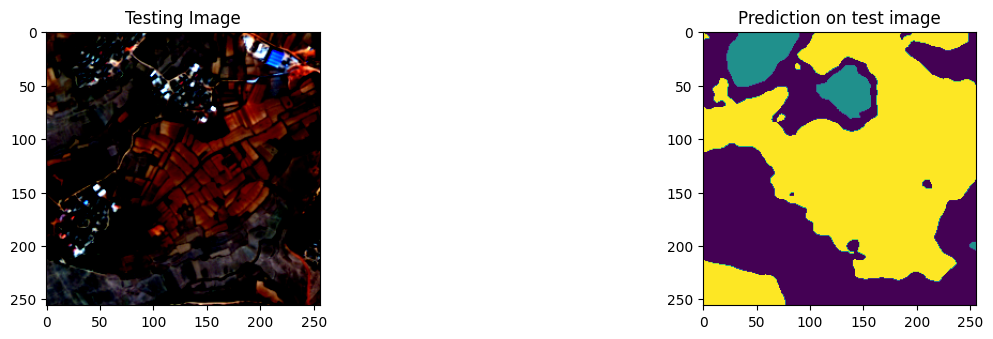

In [155]:
eval_preds_img_gen = trainGenerator1("1/2","1/3", num_class=N_CLASSES)
test_image_batch, test_mask_batch = eval_preds_img_gen.__next__()


# x, y = show_examples(eval_preds_img_gen)
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3)

# test_pred_batch = model.predict(test_image_batch[:, :, :, :])
test_pred_batch = model.predict(test_image_batch)
# test_pred_batch = model.predict(test_image_batch[:, :, :, :, 0])


IOU_keras = MeanIoU(num_classes=N_CLASSES, ignore_class=[0]) # you can ignore "background" class
# IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

img_num = random.randint(0, test_image_batch.shape[0]-1)


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_image_batch[2])
# plt.subplot(232)
# plt.title('Testing Label')
# plt.imshow(test_mask_batch_argmax[img_num])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_pred_batch_argmax[2])
plt.show()

# for i in range(0, 3):
#   combined_data = np.array(list(np.unique(test_mask_batch_argmax[0+i])) + list(np.unique(test_pred_batch_argmax[img_num+i])))
#   _min, _max = np.amin(combined_data), np.amax(combined_data)
#   plt.figure(figsize=(15, 15), dpi=80)

#   plt.subplot(1,3,1)
#   plt.imshow(test_image_batch[:, :, :, :, 1][img_num+i].astype('uint8'))

#   plt.subplot(1,3,2)
#   plt.imshow(test_image_batch[:, :, :, :, 1][img_num+i].astype('uint8'))
#   plt.subplot(1,3,2)
#   show_mask_with_label(test_mask_batch_argmax[img_num+i], labels, _min, _max, alpha=0.9)

#   plt.subplot(1,3,3)
#   show_mask_with_label(test_pred_batch_argmax[img_num+i], labels, _min, _max)
#   plt.show()
#   test_image_batch, test_mask_batch = eval_preds_img_gen.__next__()
#   test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3)

#   test_pred_batch = model.predict(test_image_batch[:, :, :, :, 0])
#   test_pred_batch_argmax = np.argmax(test_pred_batch, axis=3)


#   IOU_keras = MeanIoU(num_classes=N_CLASSES, ignore_class=[0]) # you can ignore "background" class
#   IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
#   print("Mean IoU =", IOU_keras.result().numpy())

#   img_num = random.randint(0, test_image_batch.shape[0]-4)
# test_pred_batch = model.predict(eval_preds_img_gen[:, :, :, :, 0])


# img_data_gen_args = dict(horizontal_flip=True,
#                       vertical_flip=True,
#                       fill_mode='reflect')
# image_datagen = ImageDataGenerator(**img_data_gen_args)
 
    
# image_generator = image_datagen.flow_from_directory(
#         "/content/1/",
#         class_mode = None,
#         batch_size = BATCH_SIZE,
#         seed = SEED)

# train_generator = image_generator
# print(train_generator) 
# for (img) in train_generator:
      
#             raw_img = np.copy(img)
#             # print(raw_img)
#             img = preprocess_input(img)
#             img = np.stack((img, raw_img), axis=-1)
# test_pred_batch = model.predict(test_image_batch[:, :, :, :, 0])


In [ ]:

# scaler = MinMaxScaler()
# img = cv2.imread("/content/1/3/GF2_PMS1__L1A0000564539-MSS1_15label_00.tif")  #N-34-66-C-c-4-3.tif, N-34-97-D-c-2-4.tif
# input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
# input_img = preprocess_input(input_img)
# input_img.shape
# test_pred_batch = model.predict(input_img)


(256, 256, 3)


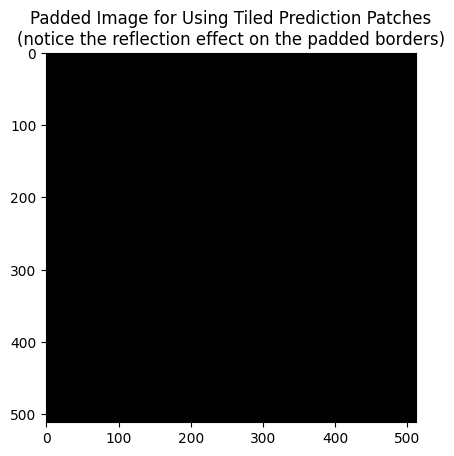

  0%|          | 0/8 [00:00<?, ?it/s]

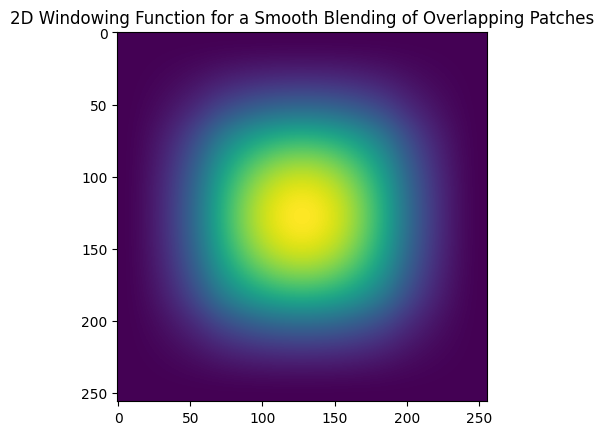

1/1 [==============================] - 4s 4s/step


 12%|█▎        | 1/8 [00:06<00:43,  6.16s/it]

1/1 [==============================] - 2s 2s/step


 25%|██▌       | 2/8 [00:10<00:30,  5.12s/it]

1/1 [==============================] - 2s 2s/step


 38%|███▊      | 3/8 [00:14<00:21,  4.38s/it]

1/1 [==============================] - 2s 2s/step


 50%|█████     | 4/8 [00:17<00:16,  4.10s/it]

1/1 [==============================] - 3s 3s/step


 62%|██████▎   | 5/8 [00:23<00:13,  4.61s/it]

1/1 [==============================] - 7s 7s/step


 75%|███████▌  | 6/8 [00:36<00:15,  7.64s/it]

1/1 [==============================] - 4s 4s/step


 88%|████████▊ | 7/8 [00:43<00:07,  7.42s/it]

1/1 [==============================] - 2s 2s/step


100%|██████████| 8/8 [00:47<00:00,  6.00s/it]


TypeError: ignored

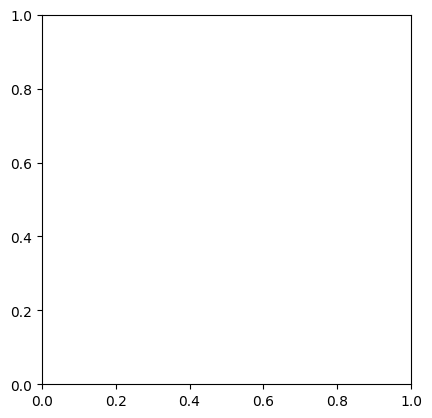

In [37]:


# preprocess_input = sm.get_preprocessing(BACKBONE)
# img = cv2.imread("/content/1/3/GF2_PMS1__L1A0000564539-MSS1_15label_00.tif")  #N-34-66-C-c-4-3.tif, N-34-97-D-c-2-4.tif
# print(img.shape)
# input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
# input_img = preprocess_input(input_img)


# predictions_smooth = predict_img_with_smooth_windowing(
#     input_img,
#     window_size=256,
#     subdivisions=2,  # Minimal amount of overlap for windowing. Must be an even number.
#     nb_classes=14,
#     pred_func=(
#         lambda img_batch_subdiv: model.predict((img_batch_subdiv))
#     )
# )
# final_prediction = np.argmax(predictions_smooth, axis=2)
